In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

In [4]:
def f(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def generate_offsets(n, rate=1):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=1/rate, size=n)


# Generador de Muones cortos con un $\lambda = 0.1$

Las caracteristicas de la función short es un $\lambda=0.1$, que el linspace temporal esta hecho solo hasta 150ns xq es innecesario hacer más y que los archivos generados lo llama ..._short

In [5]:
def export_data_short(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_photons_short.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_short(n_photons):
    lambda_rate = 0.28 # Rate parameter for the exponential distribution -> esto es lo que lo hace corto
    random_offsets = generate_offsets(n_photons, rate=lambda_rate)
    print(random_offsets)
    t_values = np.linspace(0, 150, 3000)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    
    for offset in random_offsets:
        individual_values = f(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_short(t_values, summed_values, n_photons)

[ 0.3231716  13.68797949]


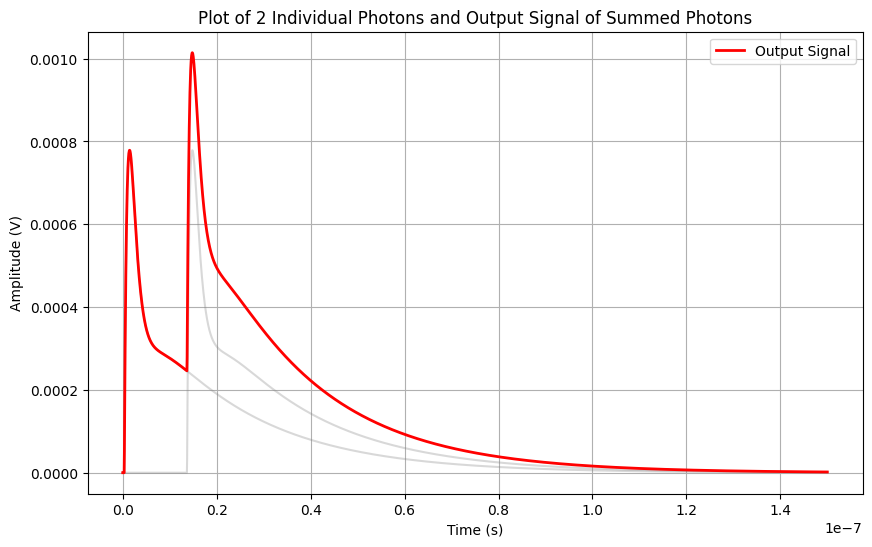

[0.63544035 0.96625112 0.68333028 2.31650658]


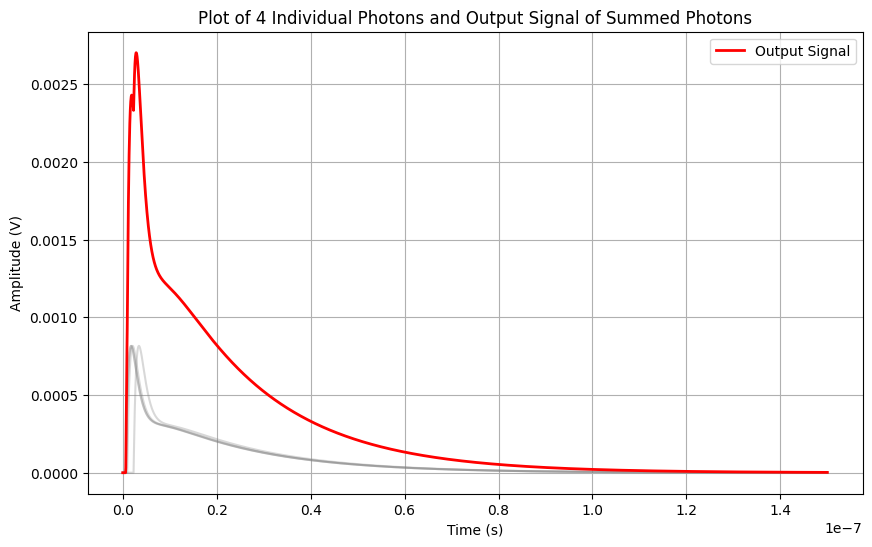

[6.62465703 1.00630124 3.42135479 6.11273803 0.76984982 0.5994284 ]


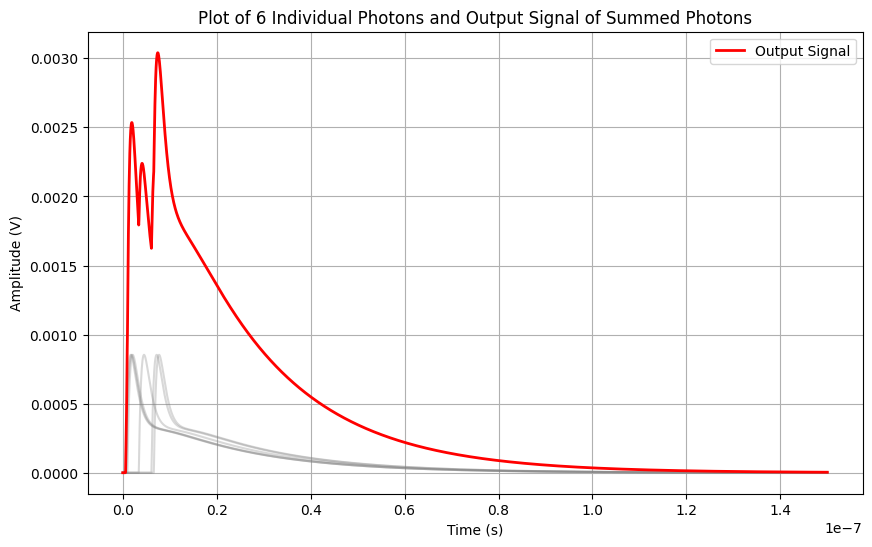

[ 1.47569244 10.01872744 10.29215474  0.60033914  3.6363786   2.43071595
  6.07011063  4.46571861  0.89684139  2.73002935]


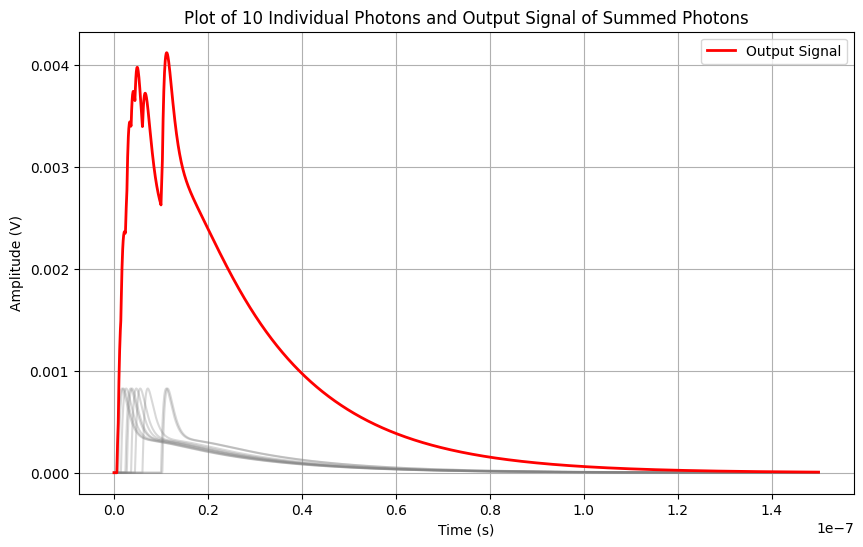

[0.60152178 0.74110715 5.44455391 3.75713179 0.41170593 0.52482101
 1.94460247 1.70568858 1.64651485 2.78291648 1.0368379  0.29732808
 0.92282787 2.30251789]


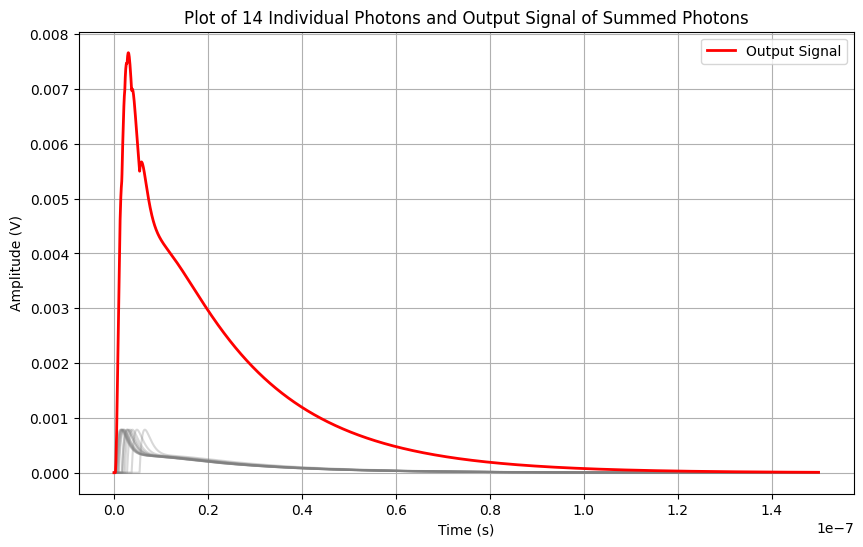

[26.32669073  2.34146524  1.1513092   0.3683834   2.52676583  2.90179139
  0.54511149  0.27490692  0.52081635  1.50046844  3.9671829   1.19619013
  1.52455973  6.81454061  2.12482982  7.19619362  4.04428862  5.93920483
  0.84880028  3.31398895]


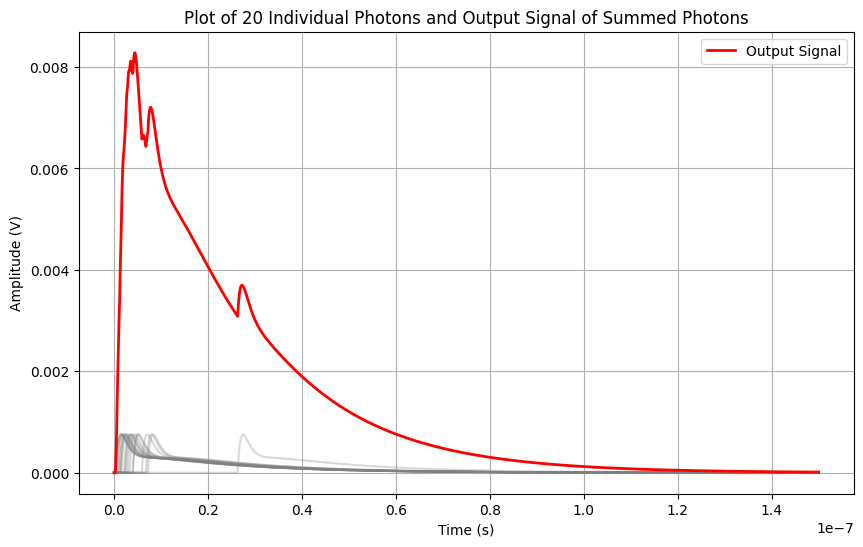

[ 0.16244568  4.08371183  6.40192513  4.09238219  0.38811948 10.52570519
 11.65208224  8.81205972  4.93254222  1.40257455  2.63386918  3.6435628
  6.75464032  0.36959981  3.97712713  5.25200194  7.84909667  3.01324814
  2.44698135  0.46509717  4.28608027  5.48123994  4.10862955  0.02029967
  6.20053385  3.99933541  3.76623075  1.57835925  4.08065099  7.5532809
  0.70856205  0.39420154  0.50549552  1.64609094  4.26231585  1.84221393
  2.39350654  4.46758811  0.85916475 11.53580349  2.6025294   6.5555706
  0.24949192  0.24028183  0.8538946   5.51997695  4.27840753  1.91344793
  2.96774574  3.22436762]


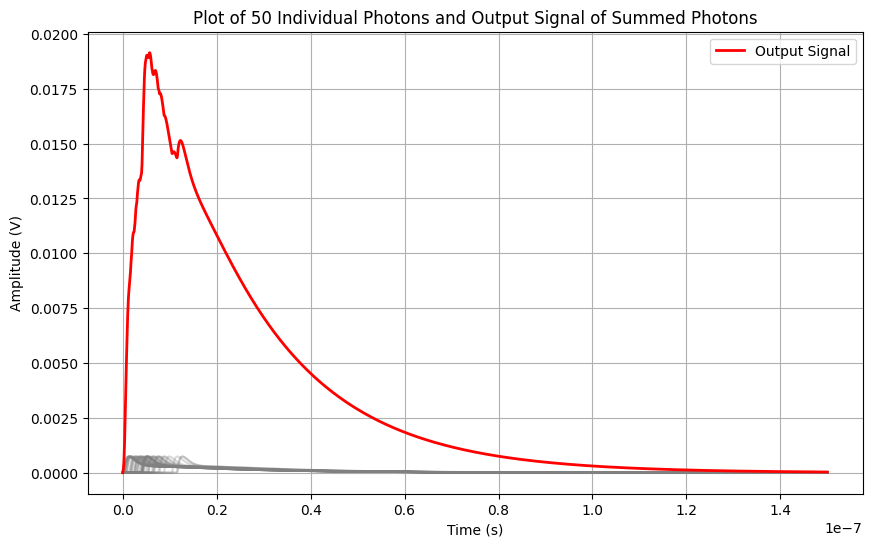

[1.58326804e+00 5.04518990e+00 7.15641355e+00 8.47264188e-01
 3.25955553e+00 3.47575886e-01 1.13701208e+00 2.25028491e+00
 2.30791605e+00 4.17426519e+00 2.14955618e+00 2.98903155e+00
 7.59572047e+00 9.09176503e+00 5.56211823e-01 2.02284075e-01
 2.81782173e-01 6.85214710e+00 4.41066090e+00 2.31309931e+00
 2.11935416e+00 6.87488850e+00 6.50269732e+00 9.77911661e-01
 2.06846549e+00 2.62901588e+00 1.08014792e+01 1.15565614e+00
 9.72217542e-01 5.89466261e+00 3.09812616e+00 5.71998415e+00
 4.92515280e+00 4.58455485e-01 5.28893540e+00 1.18154389e+00
 3.43816574e+00 1.96006150e+00 3.24343443e+00 2.64486713e+00
 8.17736456e+00 3.33445586e+00 1.83448837e-01 4.57038073e-01
 1.93101672e+00 1.50576023e+01 3.71844822e+00 8.17626975e+00
 3.28543465e+00 1.38851802e+00 1.60732197e+00 1.45598945e+00
 8.35524521e-01 8.08637802e+00 1.79725415e+00 2.03434904e-01
 2.51267805e+00 6.07578474e+00 1.15299398e+01 4.60366048e+00
 6.25894771e-01 1.40573744e+00 3.67152111e+00 6.37133197e+00
 4.99171523e+00 1.131266

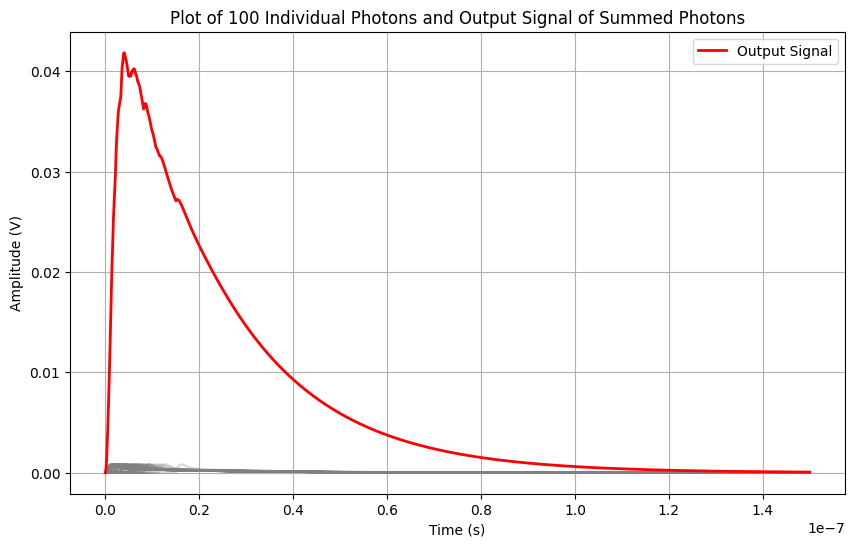

In [6]:
# Generate and export data for different numbers of photons
photons_list_short = [2, 4, 6, 10, 14, 20, 50, 100]  # Example numbers of photons
for n in photons_list_short:
    simulate_photon_data_short(n)


# Generador de Muones largos con $\lambda = 0.01$

Las caracteristicas de la función long es un $\lambda=0.01$, que el linspace temporal esta hecho alagrado hasta 700ns xq ahora la nueva distr de probabilidad de la cual sampleo los offsets temporales es más larga y que los archivos generados lo llama ..._long

In [37]:
def export_data_long(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_photons_long.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_long(n_photons):
    lambda_rate = 0.01 # Rate parameter for the exponential distribution
    random_offsets = generate_offsets(n_photons, rate=lambda_rate)
    t_values = np.linspace(0, 700, 5000) # Aca modifico un poco el linspace xq como estan más espaciados lo fotones, se me van del plot
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    
    for offset in random_offsets:
        individual_values = f(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_long(t_values, summed_values, n_photons)

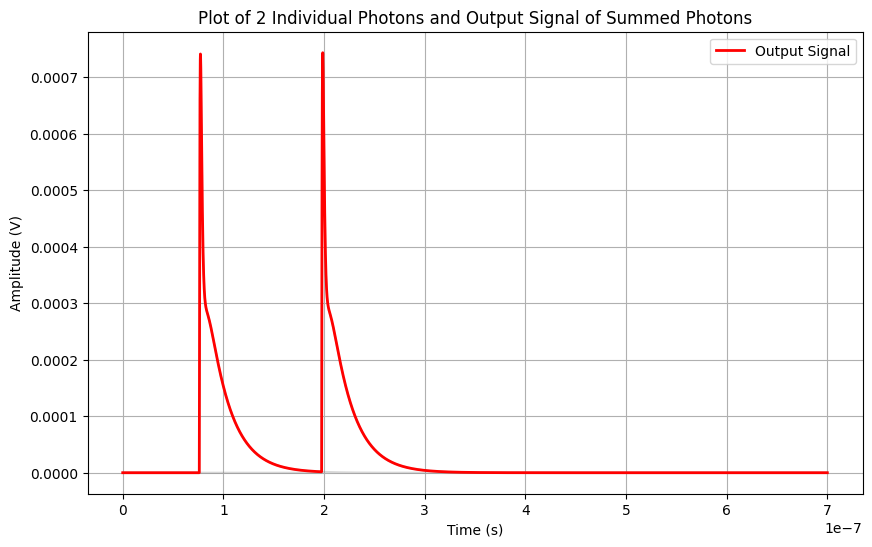

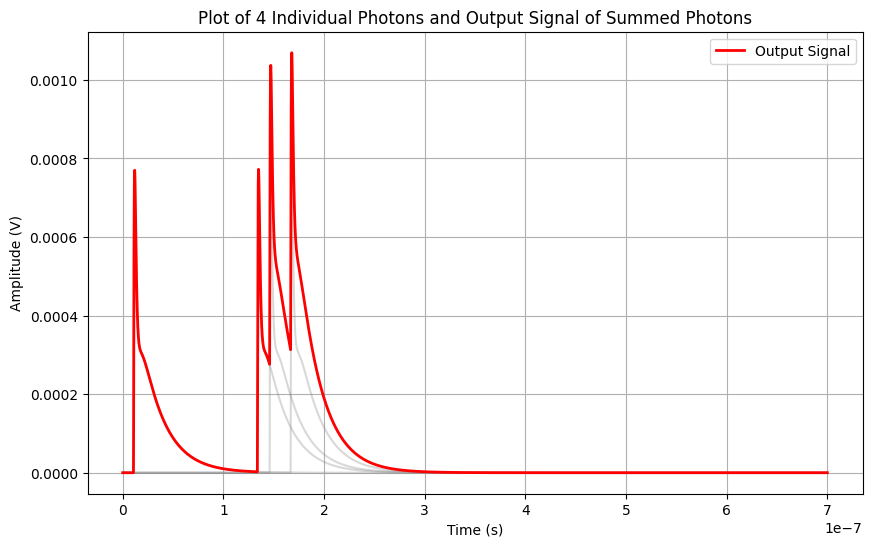

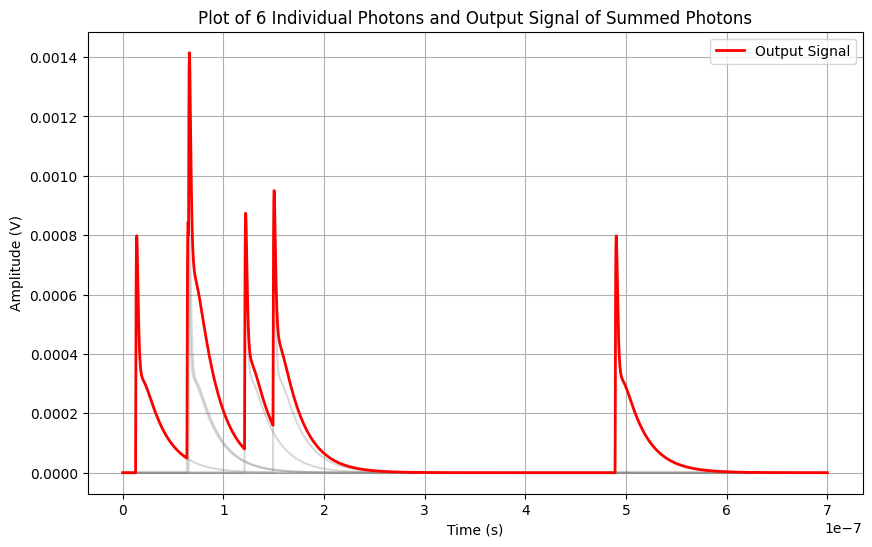

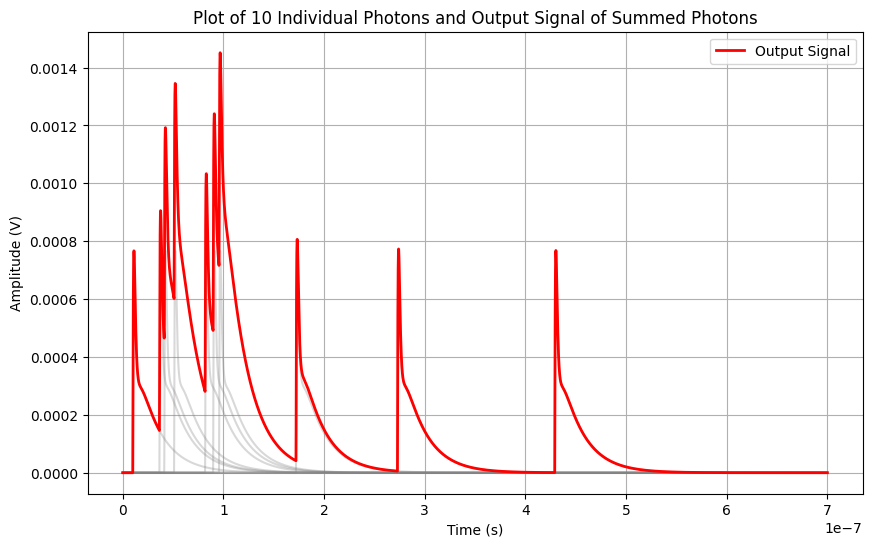

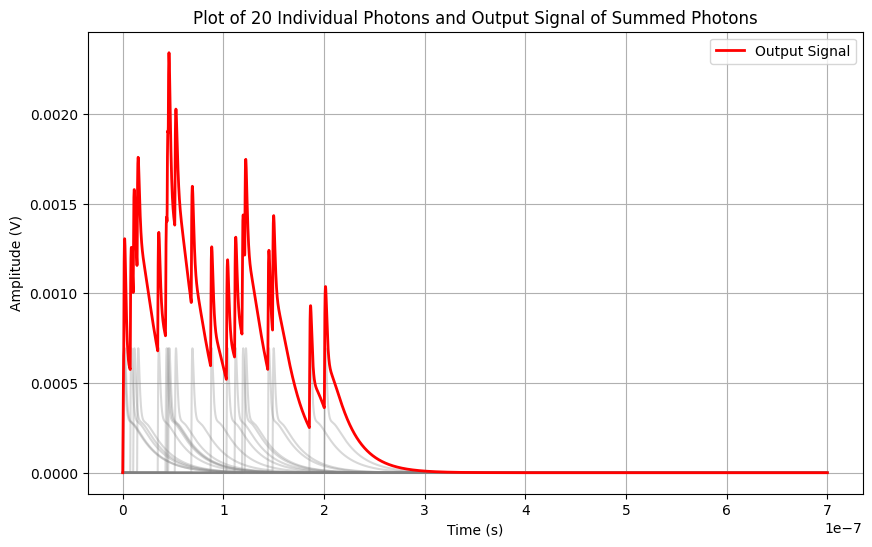

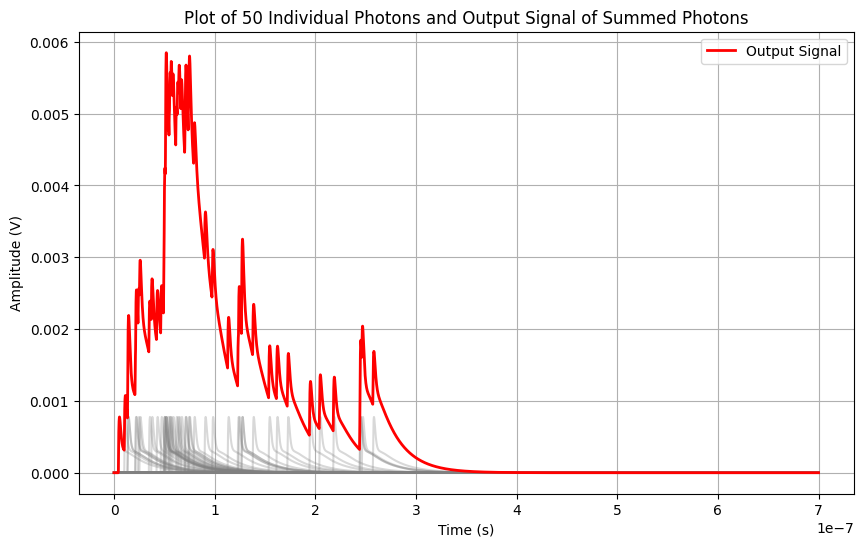

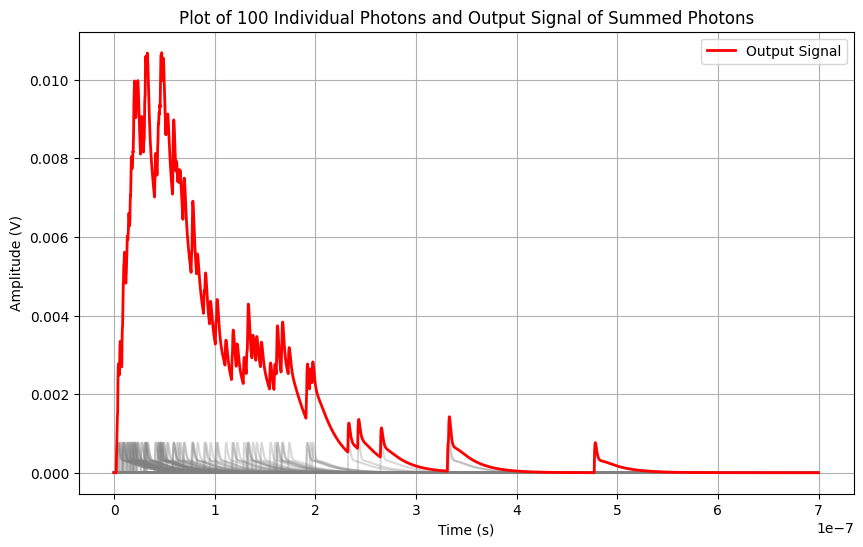

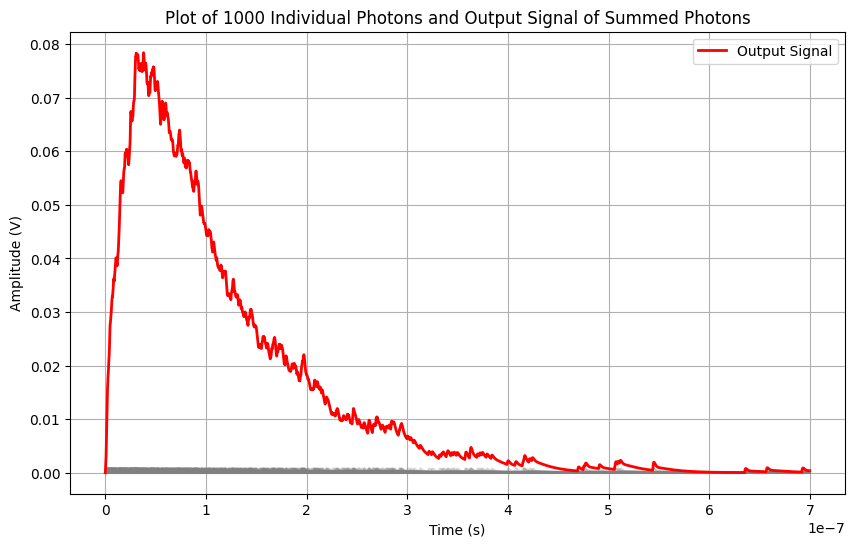

In [38]:
# Generate and export data for different numbers of photons
photons_list_long = [2, 4, 6, 10, 20, 50, 100, 1000]  # Example numbers of photons
for n in photons_list_long:
    simulate_photon_data_long(n)

# Generador de señales de n-Fotoequivalentes (PEs)

Aca busco generar señales de 1, 2 y 3 Fotoequivalentes (la diferencia con lo anterior es que los fotones no tienen offset temporal) para poder hacer el análisis de donde deberia poner el V del threshold del discriminador. Modifico los nombres de los archivos a ..._{n}_photoequivalent, directamente multiplico la señal de 1PE por la cantidad que quiero simular.

In [39]:
def export_data_photoequivalent(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_photoequivalent.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_photoequivalent(n_photons):
    t_values = np.linspace(0, 100, 1500)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    data = n_photons*f(t_values, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
    
    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting function
    plt.plot(t_values, data, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_photoequivalent(t_values, data, n_photons)

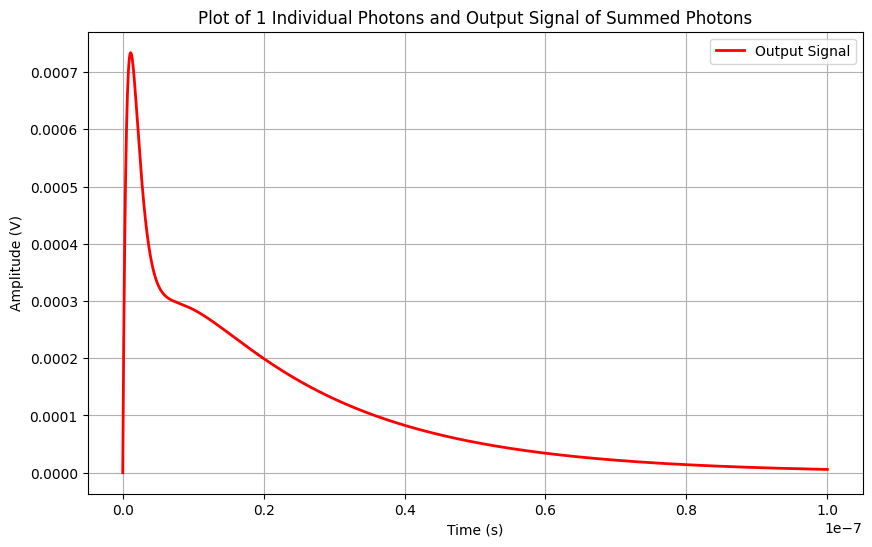

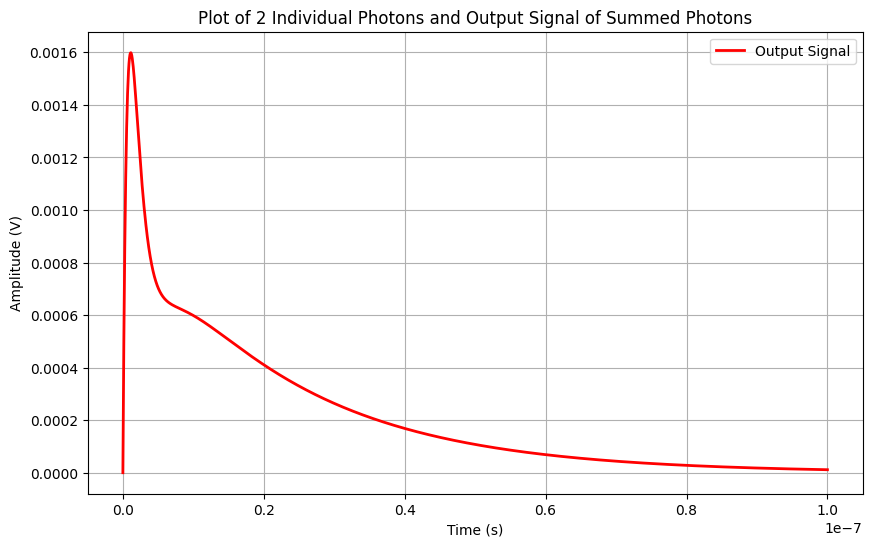

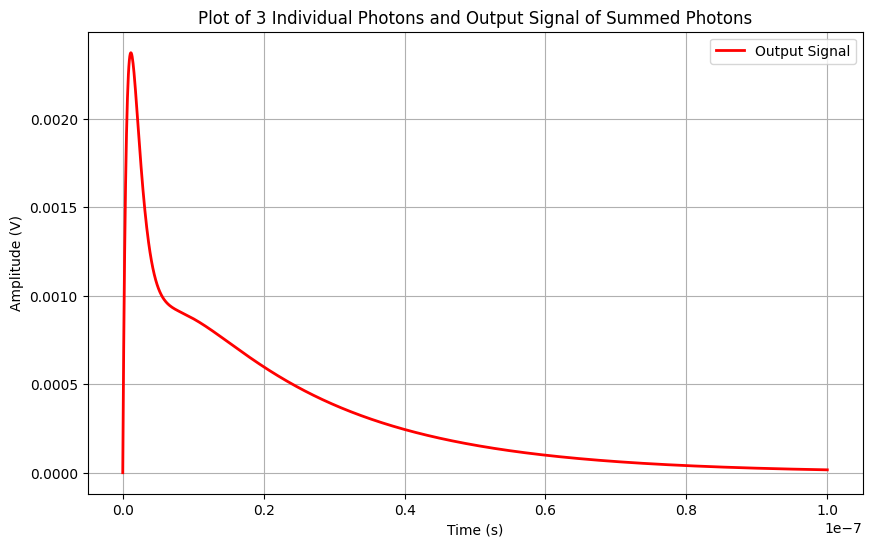

In [40]:
# Generate and export data for different numbers of photons
photons_list_photoequivalent = [1, 2, 3]  # Example numbers of photons
for n in photons_list_photoequivalent:
    simulate_photon_data_photoequivalent(n)

## Análisis de variabilidad de los n-Fotoequivalentes (PEs)

Aca busco generar señales de 1, 2 y 3 Fotoequivalentes muchas veces (del orden de 1000 sims x cada uno) para poder calcular el pulso medio de los fotoequivalentes.

In [41]:
def export_data_photoequivalent_avg(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_photoequivalent_avg.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_photoequivalent_avg(n_photons):

    sims = 1000
    t_values = np.linspace(0, 100, 1500)
    summed_values = np.zeros_like(t_values)

    plt.figure(figsize=(10, 6))

    data = 0
    
    for _ in range(sims): # Tengo que meter los sampleos de los parametros de la distribucion adentro del for loop para que cambien en cada iteración
        # Parameters sampled from normal distributions
        A1 = norm.rvs(loc=0.3, scale=0.01)
        A2 = norm.rvs(loc=23.8, scale=0.2)
        A3 = norm.rvs(loc=1.59, scale=0.01)
        tau1 = norm.rvs(loc=3.9, scale=0.2) 
        tau2 = norm.rvs(loc=1.13, scale=0.02)
        tau3 = norm.rvs(loc=22.20, scale=0.4) 
        tau4 = norm.rvs(loc=0.251, scale=0.005) 
        
        data += n_photons*f(t_values, A1, A2, A3, tau1, tau2, tau3, tau4)/1000

    data_avg = data/sims
    
    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting function
    plt.plot(t_values, data_avg, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_photoequivalent_avg(t_values, data_avg, n_photons)

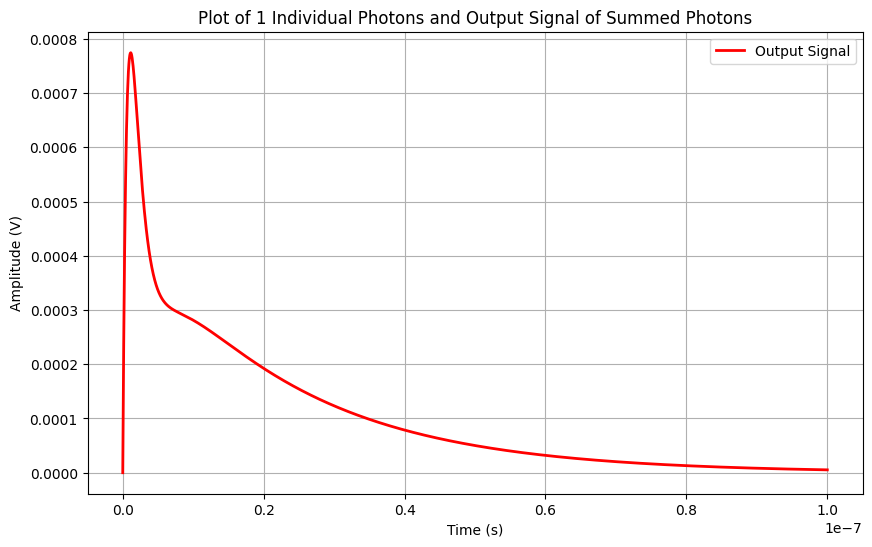

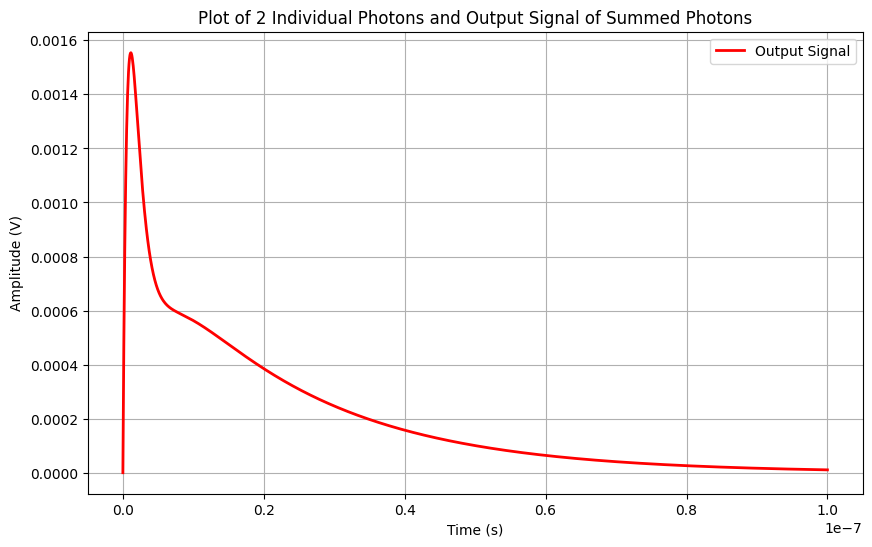

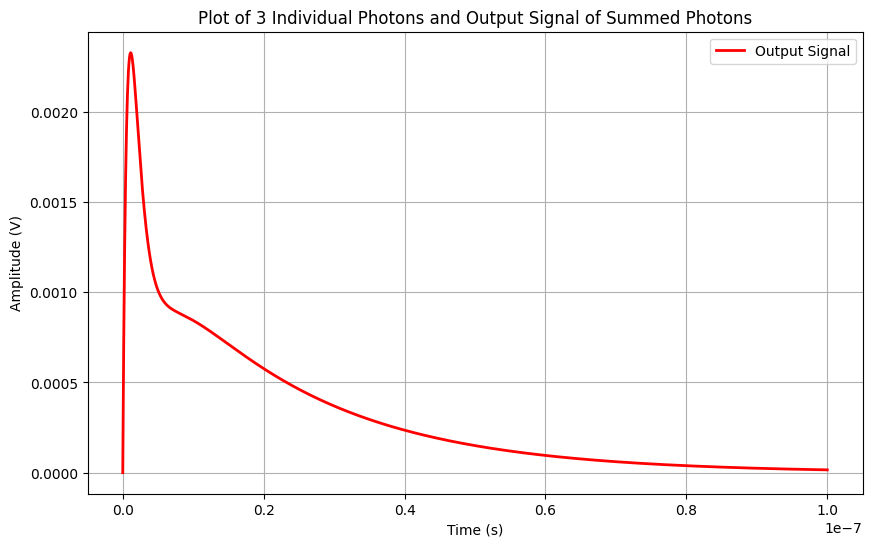

In [42]:
# Generate and export data for different numbers of photons
photons_list_photoequivalent = [1,2,3]  # Example numbers of photons
for n in photons_list_photoequivalent:
    simulate_photon_data_photoequivalent_avg(n)

Voy a ver si puedo hacer lo mismo pero vectorizado (eso me disminuye mucho el tiempo de ejecución) -> después veo esto (creo que hacer el promedio directo en A1, A2, A3 etc es lo mismo)

1000


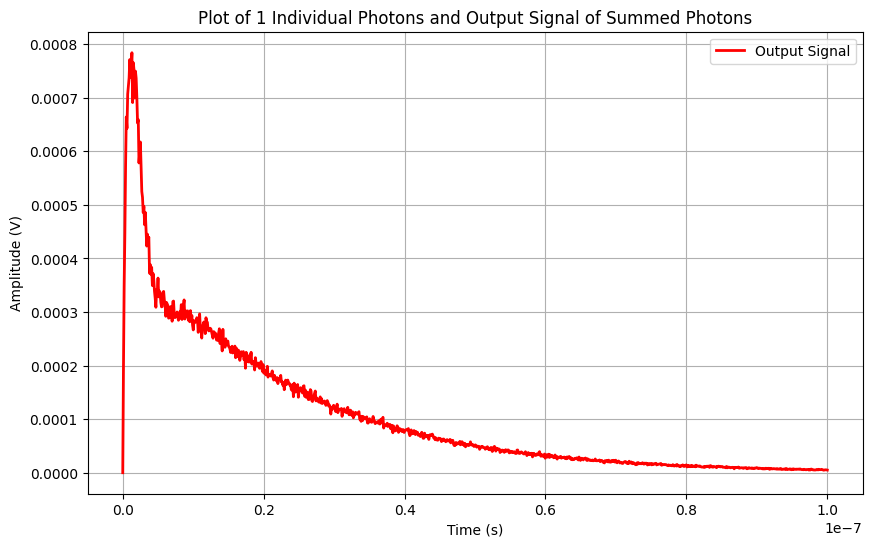

In [57]:
def export_data_photoequivalent_avg_vect(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_photoequivalent_avg.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_photoequivalent_avg_vect(n_photons):
    
    sims = 1000
    t_values = np.linspace(0, 100, 1000)
    summed_values = np.zeros_like(t_values)

    plt.figure(figsize=(10, 6))

    A1 = norm.rvs(loc=0.3, scale=0.01, size=sims)
    #print(A1)
    #print(np.mean(A1))
    A2 = norm.rvs(loc=23.8, scale=0.2, size=sims)
    A3 = norm.rvs(loc=1.59, scale=0.01, size=sims)
    tau1 = norm.rvs(loc=3.9, scale=0.2, size=sims) 
    tau2 = norm.rvs(loc=1.13, scale=0.02, size=sims)
    tau3 = norm.rvs(loc=22.20, scale=0.4, size=sims) 
    tau4 = norm.rvs(loc=0.251, scale=0.005, size=sims)
    
    data = n_photons*f(t_values, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
    print(np.size(data))
    
    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting function
    plt.plot(t_values, data, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_photoequivalent_avg_vect(t_values, data, n_photons)


# Generate and export data for different numbers of photons
photons_list_photoequivalent = [1]  # Example numbers of photons
for n in photons_list_photoequivalent:
    simulate_photon_data_photoequivalent_avg_vect(n)